# Predictive Modelling of Eating-Out Problem 
## Assignment -1 
### Data Sceince Technology and Systems 
#### Student Name: Tamzid Ibrahim
#### Student ID: u3265713

## Part B
### Predictive Modelling

This part of the project aims to classify and predict the two target variables in the dataset namely Rating Text and Rating Number using several machine learning algorithms. 

Key objectives of this part of the project: 

- Preprocessing and cleaning the dataset for model prediction

- Builing and evaluating both regression and classification models on the zomato data

- Comparing the performance of the models 

##### **Loading the Packages:** 


In [1]:
# Loading the packages requred for the modelling part
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### **Loading the Zomato Data Set:** 


In [2]:
#Specifying the file path of the dataset
file_path = "data/zomato_df_final_data.csv"
#Loading the dataset 
zomato = pd.read_csv(file_path)

### Part B - I - Feature Engineering & Data Cleaning

**Data Cleaning** 

The dataset contains various missing values, the missing values will be handled using various techniques appropriate for the data in the following parts of the project. Data cleaning is very cruicial for modelling. 

**Feature Selection** 

Not all of the features or columns present in the data will not be used for modelling, proper feature selection is very crucial for model performance and making the model more efficient. 

**1. Performing Data cleaning to deal with missing values**

In [3]:
# Using the columns attribute to print the column names
# Here the list() is used to to avoid showing the 'Index' part
print("The column names are:", list(zomato.columns)) 

The column names are: ['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone', 'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes', 'groupon', 'color', 'cost_2', 'cuisine_color']


Printing the column names in order to understand the data more, it is very evident from looking at the column names that, rating_number and rating_text are the target variables. 

In [4]:
# Printing the summary of the dataset 
print(zomato.info())
# Printing the null values in the columns with missing values by using isnull and sum methods
print("\nNull values in each column: \n", zomato.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

Finding the missing values in each column and finding out what percentage of values are missing in those columns. 

In [5]:
# Calculating the missing values in each column and calculating the percentage of missing values per column 
# Calculating the missing values in each column of the 'zomato' DataFrame
missing_data = zomato.isna().sum()
# Calculating the percentage of missing data for each column
missing_percentage  = (missing_data / len(zomato)) * 100
# Printing the percentage of missing values for each column
print(missing_percentage)

address           0.000000
cost              3.295238
cuisine           0.000000
lat               1.828571
link              0.000000
lng               1.828571
phone             0.000000
rating_number    31.580952
rating_text      31.580952
subzone           0.000000
title             0.000000
type              0.457143
votes            31.580952
groupon           0.000000
color             0.000000
cost_2            3.295238
cuisine_color     0.000000
dtype: float64


It can be observed that rating_number, rating_text and votes have the most amount of missing values, all three of the columns have 31.58% missing values. 

As rating_number and rating_text are the target variables, it is very cruicial on how these missing values are dealt with. 

**Dealing with missing values in Target Variables i.e rating_number and rating_text**

The best possible way to deal with the missing values in the target variables, i.e rating_number and rating_text, is to remove them. Even though they represent a significant portion of the dataset (31.58$). These variables are our targets for regression and classification tasks, any missing values would compromise the models.

But on the other hand, imputing values in the target variable may introduce artificail estimates, leading to distorted relationships between the features and the target variable. This can lead ot unrealiable predictions and degrade model performance. 

Unlinke other missing feature values, ratings of restaurants are highly personal, so we cant really logically estimate ratings from available data, hense guessing ratings could distort the overall distribution of the data. Since these ratings are subjective and dependent on actual user inputs, estimating them is not feasible. 

Therefore, removing rows with missing values ensures data integrity and the creation of more precise models, even at the cost of reducing dataset size.



In [6]:
# Removing the rows with missing rating_number and rating text 
zomato_clean = zomato.dropna(subset=['rating_number', 'rating_text'])
# Printing the null values in the columns with missing values by using isnull and sum methods
print("\nNull values in each column: \n", zomato_clean.isnull().sum())


Null values in each column: 
 address            0
cost             103
cuisine            0
lat              115
link               0
lng              115
phone              0
rating_number      0
rating_text        0
subzone            0
title              0
type              21
votes              0
groupon            0
color              0
cost_2           103
cuisine_color      0
dtype: int64


The above snippet of code suggests that the code effectively removes the null values in the target variables rating_number and rating_text, along with the missing values in the target variable. The missing values in the vote feature also got removed. So, it can be deciphered that, the ratings were missing because these restaurants were unrated and no one actually gave votes for these restaurants. So, rather than imputing the rating number and rating text the best possible action was deleting the missing rows. 

**Dealing with the missing values in the cost column**

Before dealing with the missing values of the cost a histogram is created for the feature to understand the data

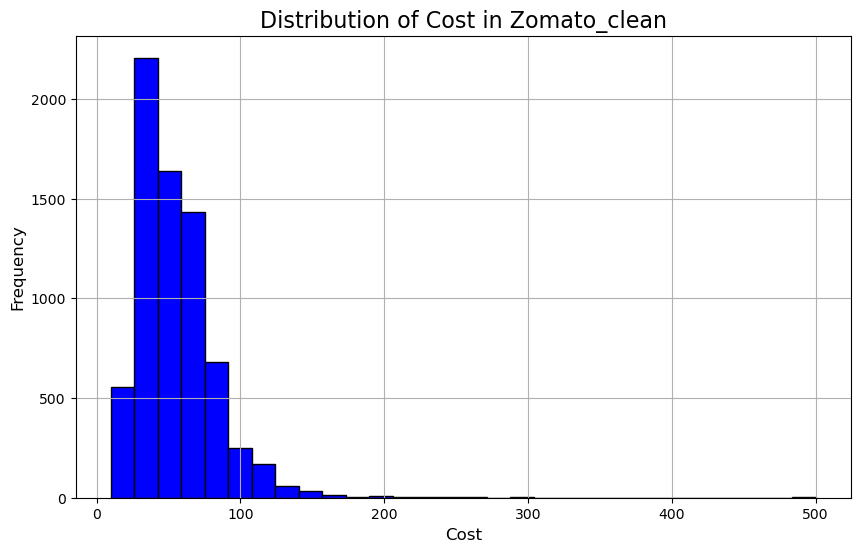

In [7]:
# Creating a histogram to visualize the distribution of the 'cost' column in the 'zomato_clean' DataFrame
plt.figure(figsize=(10, 6))
# Number of bins have been set to 30 the fill colour to blue 
plt.hist(zomato_clean['cost'], bins=30, color='blue', edgecolor='black')
# Setting the title and its font size 
plt.title('Distribution of Cost in Zomato_clean', fontsize=16)
# Setting the labels 
plt.xlabel('Cost', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Showing the grid 
plt.grid(True)
plt.show()

The histogram of the cost column shows that values in the feature is heavily right-skewed, indicating that there are extremete values (Certain restaurants are very very expensive). So mean imputation is completely out of the question. So, to deal with the missing values imputation will done by using the median of the cost column. 

In [8]:
# Imputing the missing values in the cost column by using the median
# Using the 'fillna' method to replace NaN values in the 'cost' column with the median cost value.
# The assign method is used to modify the existing dataset
zomato_clean = zomato_clean.assign(cost=zomato_clean['cost'].fillna(zomato_clean['cost'].median()))

**Dealing with the missing values in the cost_2 column**

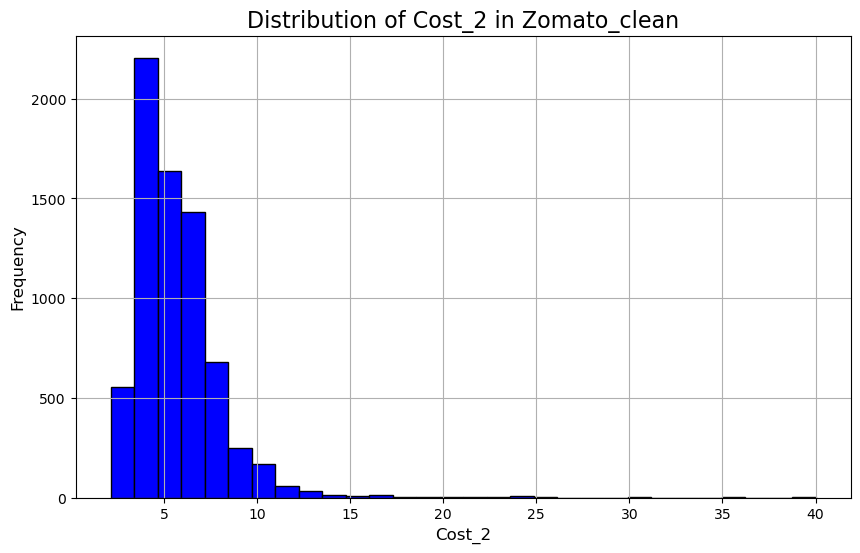

In [9]:
# Exactly similar to cost column creating a histogram for the cost_2
plt.figure(figsize=(10, 6))
plt.hist(zomato_clean['cost_2'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Cost_2 in Zomato_clean', fontsize=16)
plt.xlabel('Cost_2', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

The histogram of the cost_2 column is also right skewed, similar to the cost column, median imputation will be done to remove the na values. 

In [10]:
# Similar to that of the cost column, imputing the cost_2 column missing values with median
zomato_clean = zomato_clean.assign(cost_2=zomato_clean['cost_2'].fillna(zomato_clean['cost_2'].median()))

In [11]:
# Printing the null values in the columns with missing values by using isnull and sum method
print("\nNull values in each column: \n", zomato_clean.isnull().sum())


Null values in each column: 
 address            0
cost               0
cuisine            0
lat              115
link               0
lng              115
phone              0
rating_number      0
rating_text        0
subzone            0
title              0
type              21
votes              0
groupon            0
color              0
cost_2             0
cuisine_color      0
dtype: int64


The cost column and the cost_2 columns have been sucessfully imputed by their median values. 

But there are other features with missing values, both lat and lng has 115 values and type has 21 missing values. 

**Dealing with the missing values in type column**

As there are only 21 rows with missing values in the type column, this number is very negligible considering the size of the dataset, thus the rows with missing values will be dropped. 

In [12]:
# Dropping the rows which have NA in type
zomato_clean = zomato_clean.dropna(subset=['type'])

In [13]:
# Printing the null values in the columns with missing values by using isnull and sum methods
print("\nNull values in each column: \n", zomato_clean.isnull().sum())


Null values in each column: 
 address            0
cost               0
cuisine            0
lat              115
link               0
lng              115
phone              0
rating_number      0
rating_text        0
subzone            0
title              0
type               0
votes              0
groupon            0
color              0
cost_2             0
cuisine_color      0
dtype: int64


Various strategies were implemented in the data preprocessing phase for addressing the missing values in the datset, the strategies used was tailored to the nature and importance of each column. 

For the target variables, the rows which had missing rating_number and rating_text had been completely removed, eventhough it reduced the dataset size by 31.58%, but the integrity of the data was preserved to ensure more accurate model outcomes. 




The missing values have been addressed in the previous steps, for the case of target variables rating_number and rating_text, the rows with NAs were completely removed due their critical role in predictive modelling. For the cost and cost_2 columns, median imputation was applied to manage missing and extreme values, given their right-skewed distributions. Additionally, rows with missing values in the type column were dropped due to the small number of missing entries. The missing values in the lat and lng columns will be addressed after assessing their relevance in the modeling process. 

**2. Preparing the data for modelling setup**

**Managing the Numerical columns**

To prepare for the modelling, the categorical columns and numerical columns need to be identified

In [14]:
# Identifying categorical variables in the 'zomato_clean' DataFrame
# This includes columns with data types 'object' (strings) and 'bool' (boolean)
categorical_vars = zomato_clean.select_dtypes(include=['object', 'bool']).columns.tolist()
# Identifying numerical variables in the 'zomato_clean' DataFrame
# This includes columns with data types 'float64' and 'int64' (numeric types).
numerical_vars= zomato_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
# printing the identified categorical and numerical columns
print("Categorical columns are: ", categorical_vars) 
print("Numerical columns are: ", numerical_vars) 

Categorical columns are:  ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'groupon', 'color', 'cuisine_color']
Numerical columns are:  ['cost', 'lat', 'lng', 'rating_number', 'votes', 'cost_2']


**Dealing with lat, lng, and cost_2**

To identify important numerical variables, a correlation heatmap will be created. 

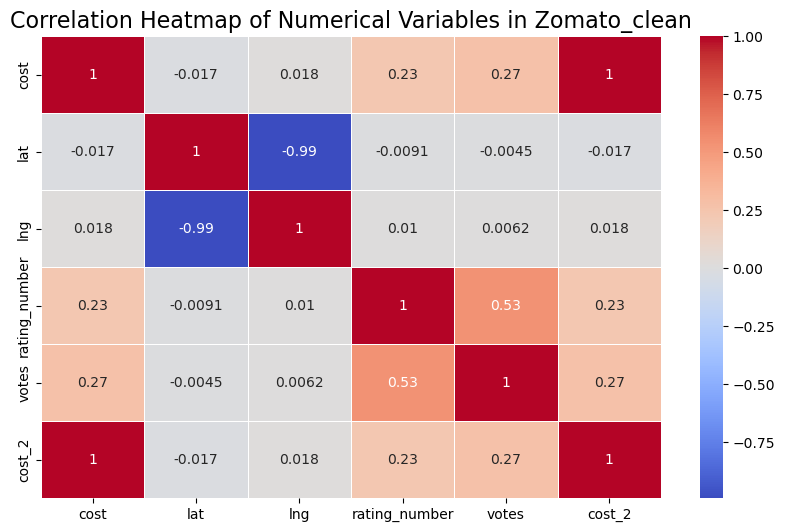

In [15]:
# Creating a correlation heatmap to visualize relationships between numerical variables in the 'zomato_clean' DataFrame
# Setting the size of the figure
plt.figure(figsize=(10, 6))
corr_matrix = zomato_clean[numerical_vars].corr()
# Plotting the heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
# Setting the titles 
plt.title('Correlation Heatmap of Numerical Variables in Zomato_clean', fontsize=16)
plt.show()

The visualized heatmap shows the relationship between the numerical variables in the data, as expected there is a strong negative correlationship between lat (latitude) and lng(longitude). Additionally rating_number is moderately related to vote indicating that high-rated restaurants tend to receive more votes. The cost and cost_2 columns are perfectly correlated since cost_2 is a transformation of cost. 

So, lat and lng columns will be removed from the data, additionally the cost_2 will also be removed because there is autocorrelation between cost and cost_2 which is not good for modelling. 

In [16]:
# Removing the 'lat', 'lng', and 'cost_2' columns from the zomato_clean dataset
zomato_clean = zomato_clean.drop(columns=['lat', 'lng', 'cost_2'])

**Dealing with the skewness of cost column**

In [17]:
# The 'np.log1p()' function is used to compute the natural logarithm of (cost + 1)
# which effectively handles any zero values in the 'cost' column and avoids issues with log(0).
zomato_clean['cost_log'] = np.log1p(zomato_clean['cost'])  

In [18]:
# Verify if there are any missing values remaining
zomato_clean.isnull().sum()

address          0
cost             0
cuisine          0
link             0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cuisine_color    0
cost_log         0
dtype: int64

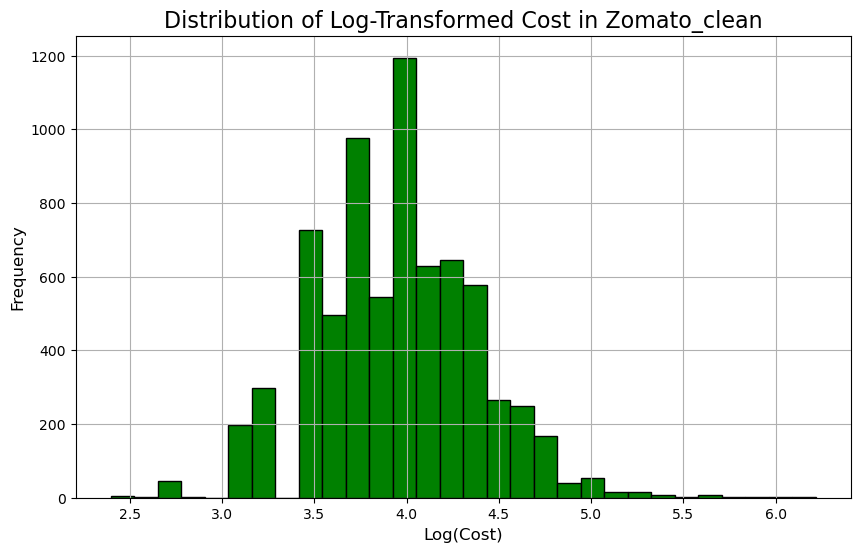

In [19]:
# Plotting the transformed 'cost_log' column
plt.figure(figsize=(10, 6))
# Setting the bin size to 30
plt.hist(zomato_clean['cost_log'], bins=30, color='green', edgecolor='black')
# Setting the title 
plt.title('Distribution of Log-Transformed Cost in Zomato_clean', fontsize=16)
# Setting the xlabel and ylabel 
plt.xlabel('Log(Cost)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

Log transormation has been applied to the cost column and after plotting, it can be seen that the distribution for the log_cost is much more normal compared to the skewed distribution of the cost column. 

In [20]:
# Dropping the cost column
zomato_clean = zomato_clean.drop(columns=['cost'])

The original cost column will be removed

**Managing the categorical columns**

**Dropping unnecessary categorical columns ('address', 'link', 'phone', 'title', 'color', 'cuisine_color')**

In [21]:
# Droppping the categorical columns 'address', 'link', 'phone', 'title', 'color', 'cuisine_color'
zomato_clean = zomato_clean.drop(columns=['address', 'link', 'phone', 'title', 'color', 'cuisine_color'])

The address, link, phone, title, color and cuisine_color columns have been dropped from the data. Because they are irrelevant to the modelling task at hand. 

**Addressing the Subzone, type, and cuisine column**

Only taking the suburb name from the subzone column

For the type and cuisine colum the lists are converted and properly formatted 

In [22]:
# Extract the location or suburb name from the 'subzone' column
# It has been assumed that the first part of the string before any commas is the suburb name
# The 'apply' function is used to apply a lambda function that splits each string by commas 
zomato_clean['subzone'] = zomato_clean['subzone'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
# Changing the 'type' and 'cuisine' column from string representation of lists to actual lists
# The 'eval' function is used here to convert the string representation back into a list,
zomato_clean['type'] = zomato_clean['type'].apply(lambda x: eval(x) if isinstance(x, str) else x)
zomato_clean['cuisine'] = zomato_clean['cuisine'].apply(lambda x: eval(x) if isinstance(x, str) else x)


**Encoding the groupon column**

In [23]:
# Performing one-hot encoding on the 'groupon' column of the 'zomato_clean' DataFrame
# The 'pd.get_dummies()' function creates new binary columns for each category in the 'groupon' column.
zomato_clean = pd.get_dummies(zomato_clean, columns=['groupon'], drop_first=True)

In [24]:
# Viewing the first 5 rows of the zomato cleaned 
zomato_clean.head()


,cuisine,rating_number,rating_text,subzone,type,votes,cost_log,groupon_True
0,"[Hot Pot, Korean BBQ, BBQ, Korean]",4.0,Very Good,CBD,[Casual Dining],1311.0,3.931826,False
1,"[Cafe, Coffee and Tea, Salad, Poké]",4.6,Excellent,The Grounds of Alexandria,[Café],3236.0,4.394449,False
2,[Japanese],4.9,Excellent,The Star,[Fine Dining],1227.0,4.795791,False
3,[Modern Australian],4.9,Excellent,Circular Quay,"[Fine Dining, Bar]",278.0,5.602119,False
4,"[Thai, Salad]",4.5,Excellent,Chinatown,[Casual Dining],2150.0,4.025352,False


**Encoding subzone, type and cuisine column**

The cuisine, type and subzone columns are prepared for machine learning analysis, by using one hot encoding. 

In [25]:
# Flattening the 'cuisine' and 'type' column by creating new binary features for each unique category
# The 'explode()' function is used to transform each element of the lists in the 'cuisine' and 'type' column into its own row
# Using one hot encoding for both cuisine and type
zomato_encoded = zomato_clean.explode('cuisine')
zomato_encoded = pd.get_dummies(zomato_encoded, columns=['cuisine'], drop_first=True)
zomato_encoded = zomato_encoded.explode('type')
zomato_encoded = pd.get_dummies(zomato_encoded, columns=['type'], drop_first=True)
# Performing one-hot encoding on the 'subzone' column to create binary features for each unique suburb
zomato_encoded = pd.get_dummies(zomato_encoded, columns=['subzone'], drop_first=True)
# Displaying the first few rows to verify the change
zomato_encoded.head()

,rating_number,rating_text,votes,cost_log,groupon_True,cuisine_African,cuisine_American,cuisine_Arabian,cuisine_Argentine,cuisine_Asian,...,subzone_Woollahra,subzone_Woolloomooloo,subzone_Wooloware,subzone_Workers Blacktown,subzone_World Square Shopping Centre,subzone_Woronora,subzone_Wynyard Station,subzone_Yarrawarrah,subzone_Zetland,subzone_revesby workers'
0,4.0,Very Good,1311.0,3.931826,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,4.0,Very Good,1311.0,3.931826,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,4.0,Very Good,1311.0,3.931826,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,4.0,Very Good,1311.0,3.931826,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.6,Excellent,3236.0,4.394449,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Numerical columns such as lat, lng, and cost_2 were removed due to high correlations that could introduce multicollinearity issues. A log transformation was applied to the cost column to correct skewness, and the original column was dropped. Categorical columns like address, link, phone, and others were deemed irrelevant and removed. The cuisine and type columns, originally stored as lists, were transformed and one-hot encoded to prepare them for analysis. Additionally, the subzone column was cleaned to extract only the suburb names, and one-hot encoding was applied to categorical features such as groupon, subzone, cuisine, and type to prepare the dataset for machine learning models.

### Part B - II - Regression

### Building Linear Regression Models

In this section, we build and evaluate two linear regression models to predict the restaurant ratings based on the features prepared in the previous steps. We will first train a standard linear regression model, followed by a regression model using stochastic gradient descent (SGD). 


**3. Building the linear_regression_model_1**

In [26]:
# Importing necessary functions for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Dropping the target columns ('rating_number' and 'rating_text') from the dataset to create features (X)
# The 'rating_number' column will be our target variable (y) that we want to predict.
X = zomato_encoded.drop(columns=['rating_number', 'rating_text'])
y = zomato_encoded['rating_number']
# Splitting the dataset into training (80%) and testing (20%) sets
# The 'random_state' parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
# Importing the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression
# Initializing the first linear regression model
model_regression_1 = LinearRegression()
# Using the fit method to fit the model
model_regression_1.fit(X_train, y_train)
# By using the the predict method we use the model to predict on the X_test values
y_pred = model_regression_1.predict(X_test)
# Calculating the Mean Squared Error for model 1
mse_model_1 = mean_squared_error(y_test, y_pred)
# Printing the Mean Squared Error for model 1
# A lower MSE is good
print("The mean square error of regression_model_1 is", mse_model_1)

The mean square error of regression_model_1 is 0.1323876442737592


**4. Building the linear_regression_model_2**

In [28]:
# Importing the SGDRegressor from scikit-learn
from sklearn.linear_model import SGDRegressor
# Initialize and train the second linear regression model using Gradient Descent
# 'max_iter=1000': This sets the maximum number of iterations for the algorithm to converge. 
# A value of 1000 is chosen to ensure that the model has enough iterations to learn from the data.
# 'learning_rate='constant'': This indicates that the learning rate remains constant throughout the training process, 
# which can provide stable convergence, especially in cases where the optimal learning rate is known in advance.
# 'eta0=0.000051': This is the initial learning rate used by the model.
model_regression_2 = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.000051)
model_regression_2.fit(X_train, y_train)
# Predicting on the test set with model_regression_2
y_pred_sgd = model_regression_2.predict(X_test)
# Calculating the Mean Squared Error for model 2
mse_model_2 = mean_squared_error(y_test, y_pred_sgd)
print("The mean square error of regression_model_2 is", mse_model_2)

The mean square error of regression_model_2 is 2.283203341994137e+20


In [29]:
# Standardizing the data to improve the performance of the SGD Regressor or the second model
# The first SGD model had a very high Mean Squared Error (MSE), indicating poor prediction accuracy.
# Standardization scales the features to have a mean of 0 and a variance of 1
# This will help the model converge more effectively and improve its performance 
from sklearn.preprocessing import StandardScaler
# Standardizing the data by using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the SGD Regressor model again with scaled data
model_regression_2 = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.000051)
model_regression_2.fit(X_train_scaled, y_train)
# Predict on the test set by using the standardized model
y_pred_sgd = model_regression_2.predict(X_test_scaled)
# Calculate the Mean Squared Error for model 2 with scaled data
mse_model_2_scaled = mean_squared_error(y_test, y_pred_sgd)
print("The mean square error of regression_model_2_scaled is", mse_model_2_scaled)

The mean square error of regression_model_2_scaled is 0.13299775820629312


**5. Reporting the mean square error(MSE) on the test data for both models**

In evaluating the performance of regression models, the Mean Squared Error (MSE) provides a quantitative measure of prediction accuracy. 

Comparing the models with their respective MSE 

Regression Model 1 (linear regression)

MSE: 0.1323876442737592

An MSE of 0.132 indicates that, on average, the square of the error or the difference between predicted values and actual values is 0.132. Even though this is a relatively low error, a lower error would have been better. It can be concluded that the model has resonably accurate predictions. 

Regression Model 2 (SGD Regressor)

MSE: 1.4281444829959446e+22

The extremely high MSE indicates a significant failure in prediction accuracy, likely due to improper convergence of the model.

Regression Model 2 with scaled data (SGD Regressor with Scaled Data)

MSE: 0.13287898284637378

After standardizing the data, the MSE of the SGD regressor improved significantly, making it comparable to regression model 1.  



### Part C - III - Classification

**6. Simplifying the problem into binary classification**

To simplify the problem into a binary classification, a binary target variable based on the rating text column has been created, the Class 1 is created to include ratings which are classfied as "Poor" and "Average" and class 2 encompasses ratings which are classified as "Good", "Very Good" and "Excellent". The implementation involves using the apply function along with a lambda expression to convert the categorical ratings into a binary format.

In [30]:
# Creating a binary target variable based on the 'rating_text' column
# We define 'Poor' and 'Average' ratings as class 1, and all other ratings as class 2.
# The 'apply' function with a lambda expression is used to convert the categorical ratings into binary format.
binary_target = zomato_encoded['rating_text'].apply(lambda x: 1 if x in ['Poor', 'Average'] else 2)
# Split the data into train (80%) and test (20%) sets with random_state set to 0 for reproducibility
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, binary_target, test_size=0.2, random_state=0)

**7. Building the logistic regression model or model_classification_3**

In [31]:
# Importing the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression
# Setting up the classification model
# Max iter sets the maximum number of iterations 
# random_state = 0 is used for reproducibility
model_classification_3 = LogisticRegression(max_iter=1000, random_state=0)
# fitting the model on the X_train and y_train
model_classification_3.fit(X_train_class, y_train_class)
# using the predict method to predict 
y_pred_class = model_classification_3.predict(X_test_class)
# Checking the model accuracy by using the score method
accuracy_model_classification_3= model_classification_3.score(X_test_class, y_test_class)
# Printing the accuracy of the model
print(f'Accuracy of Logistic Classifier: {accuracy_model_classification_3}')

Accuracy of Logistic Classifier: 0.844755774327906


A logistic regression model has been built, to classify the simplified data, after running the model it was observed that the accuracy of the model was 0.844, i.e the model predicted 84% of the data correctly. 

**8. Use the confusion matrix to report the results of using the classification model on the test data**

In [32]:
# Importing necessary for evaluation of the model
from sklearn.metrics import confusion_matrix, classification_report
# Computing the confusion matrix
# The confusion matrix summarizes the performance of the classification model
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
# Displaying the confusion matrix
print(f'Confusion Matrix:\n{conf_matrix}')
# creating the classification report for more detailed performance metrics
class_report = classification_report(y_test_class, y_pred_class)
# Printing the classification report
print(f'Classification Report:\n{class_report}')

Confusion Matrix:
[[1568  106]
 [ 304  663]]
Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.94      0.88      1674
           2       0.86      0.69      0.76       967

    accuracy                           0.84      2641
   macro avg       0.85      0.81      0.82      2641
weighted avg       0.85      0.84      0.84      2641



**9. Draw your conclusions and observations about the performance of the model relevant to the classes’ distributions.**

Conclusions and Observations

Class Performance:

Class 1 (Poor and Average): The model performs well, with a high recall of 0.94 and an F1-score of 0.88, indicating that it effectively identifies most instances of this class.

Class 2 (Good, Very Good, Excellent): The model struggles more, showing a lower recall of 0.69 and an F1-score of 0.76. This suggests that many actual Class 2 instances are misclassified as Class 1.

Precision: The precision for both classes is relatively high (0.84 for Class 1 and 0.86 for Class 2), meaning when the model predicts a class, it is mostly correct.

Overall Accuracy: The model achieves an accuracy of 0.84, indicating that it correctly predicts 84% of the test instances.

Summary

While the model is effective at predicting Class 1 ratings, it has room for improvement in identifying Class 2 ratings. The imbalance in class distribution likely contributes to this discrepancy.

**10. Repeating the classification tasks using three models of my choice.**

I have chosen KNN, DecisionTree and Random forest

In [33]:
# Importing the Kneigbours classifier
from sklearn.neighbors import KNeighborsClassifier
# Initializing and training the KNN model 
# The number of neighbors (n_neighbors) is set to 5. This parameter can be adjusted based on model performance.
model_knn = KNeighborsClassifier(n_neighbors=5)
# Fitting the model  
model_knn.fit(X_train_class, y_train_class)
# Predicting on the test set
y_pred_knn = model_knn.predict(X_test_class)
# Checking model accuracy
accuracy_knn = model_knn.score(X_test_class, y_test_class)
# Printing the accuracy
print(f'Accuracy of KNN: {accuracy_knn}')


Accuracy of KNN: 0.8848920863309353


In [34]:
# Importing the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
# Initializing and training the decision tree model
model_dt = DecisionTreeClassifier(random_state=0)
# Fitting the model
model_dt.fit(X_train_class, y_train_class)
# Predicting on the test set
y_pred_dt = model_dt.predict(X_test_class)
# Checking model accuracy
accuracy_dt = model_dt.score(X_test_class, y_test_class)
# Printing the accuracy
print(f'Accuracy of Decision Tree: {accuracy_dt}')


Accuracy of Decision Tree: 0.9121544869367664


In [35]:
# Importing the random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Initializing and training the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=0) 
model_rf.fit(X_train_class, y_train_class)
# Predicting on the test set
y_pred_rf = model_rf.predict(X_test_class)
# Checking model accuracy
accuracy_rf = model_rf.score(X_test_class, y_test_class)
# Printing the accuracy of the model
print(f'Accuracy of Random Forest: {accuracy_rf}')

Accuracy of Random Forest: 0.8928436198409694


#### Model Performance Report

In this analysis, we evaluated the performance of three classification models: K-Nearest Neighbors (KNN), Decision Tree, and Random Forest. The accuracy of each model on the test dataset is as follows:

**K-Nearest Neighbors (KNN)**: 

**Accuracy**: approximately 88.49%

The KNN model performed well, correctly classifying around 88.49% of the test instances. Its performance indicates a strong ability to generalize from the training data.

**Decision Tree**: 

**Accuracy**: approximately 91.22%

The Decision Tree model outperformed both KNN and Random Forest, achieving an accuracy of 91.22%. This suggests that the Decision Tree was effective in capturing the underlying patterns in the data.

**Random Forest**: 

**Accuracy**: approximately 89.28%

The Random Forest model demonstrated good performance as well, with an accuracy of 89.28%. While it was slightly less accurate than the Decision Tree, it still provides robust classification results due to its ensemble nature.

#### Summary
Overall, all three models exhibited strong performance, with the Decision Tree leading in accuracy. The results suggest that while KNN and Random Forest are effective, the Decision Tree may be the most reliable choice for this particular classification task. Further tuning and cross-validation could enhance these models' performance, particularly for the KNN and Random Forest classifiers.